In [1]:
#Gerekli kütüphanelerin yüklenmesi
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#Veri setinin düzenlenmesi için
from sklearn.model_selection import train_test_split, cross_val_score

#Veri setinin normalleştirilmesi için
from sklearn.preprocessing import StandardScaler

#Makine Öğrenmesi için yüklemeler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

#Hiperparametre optimizasyonu
from sklearn.model_selection import GridSearchCV

#sınıflandırma modelinin başarısının değerlendirilmesi
from sklearn.metrics import accuracy_score,f1_score,classification_report,confusion_matrix

import warnings
warnings.filterwarnings("ignore")

In [2]:
#Veri setinin yüklenmesi
#Veri seti 11 bağımsız değişken girdisi ile bağımlı değişken şarap kalitesi çıktısının sınıflandırılmasıdır
df =pd.read_csv('wine.csv')

#Veri Setinin ilk 5 değerinin görüntülenmesi
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
#Veri setinde boş veri kontrolü
df.isnull().values.any()
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
#Veri setindeki değerlerin aralıklarının, max-min gibi veri değerlerinin görüntülenmesi
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


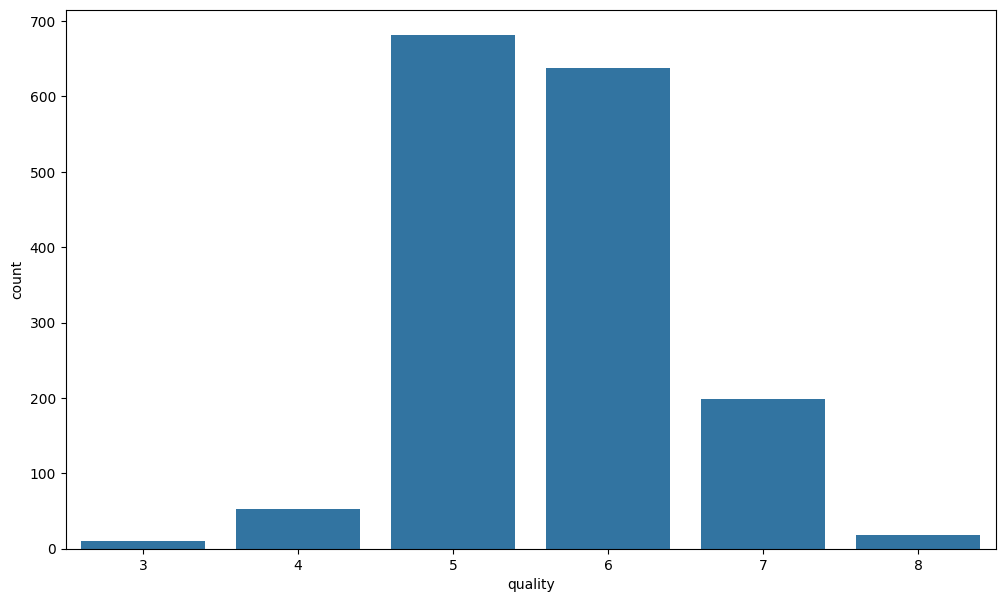

In [6]:
#Verilerin çıktı sınıfına göre dağılımları
plt.figure(figsize=(12,7))
sns.countplot(x='quality',data=df)
plt.show()

In [7]:
#Yukarıda oluşturulan grafiğin sayısallaştırılması (Hangi sınıf grubundan kaç adet verinin olduğunun inccelenmesi)
df["quality"].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

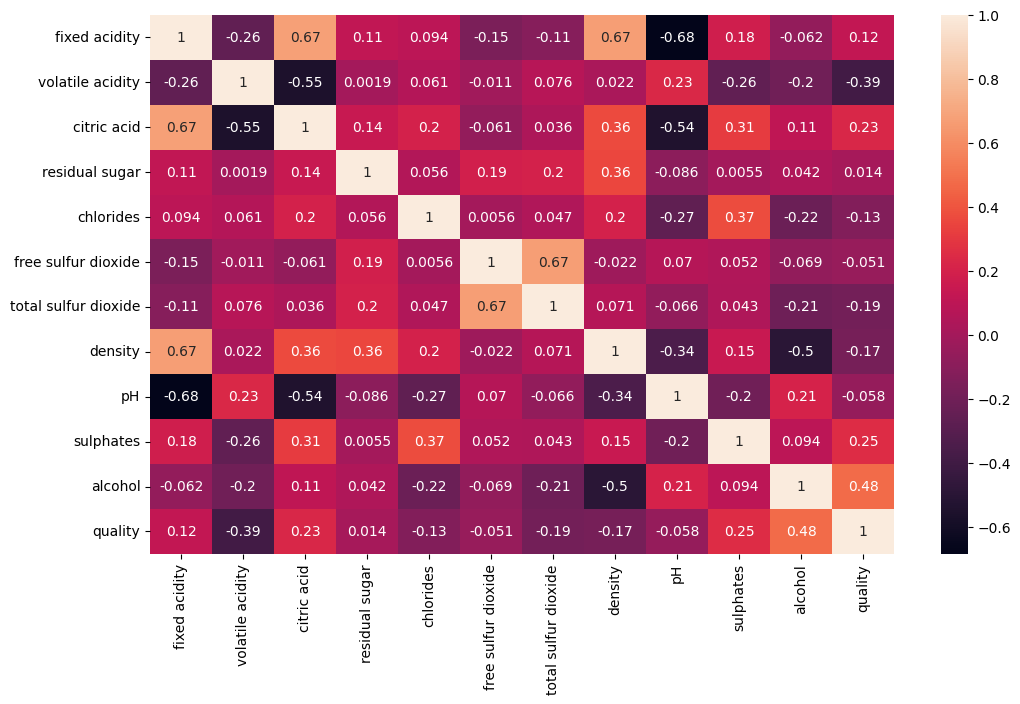

In [8]:
#Değişkenler için korelasyon analizi (Değişkenlerin birbirleriyle olan ilişkilerinin yorumlanması)
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [9]:
#Veri setinin x bağımsız değişkenler ve y bağımlı değişkenlerine ayrılması
X = df.drop(columns="quality")
y = df["quality"]

print("X input shape:" ,X.shape, "y output shape", y.shape)

X input shape: (1599, 11) y output shape (1599,)


In [10]:
#Veri setinin eğitim ve test olarak ayrılması. %80 eğitim, %20 test)
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=0)
print("X Train : ", Xtrain.shape)
print("X Test  : ", Xtest.shape)
print("Y Train : ", ytrain.shape)
print("Y Test  : ", ytest.shape)

X Train :  (1279, 11)
X Test  :  (320, 11)
Y Train :  (1279,)
Y Test  :  (320,)


In [11]:
#İncelenen iki modelin arşılaştırılması için performans değerlerinin kaydedileceği boş bir dictionary
model_results={}

In [12]:
#İlk incelenene model Multi Layer Perceptron------------------------------------------
#MLPClassifier sınıflandırma modelleri için kullanılan yapısıdır.

#Modelin oluşturulması
mlp_classifier= MLPClassifier()

#Oluşturulan modelin eğitim verileri ile eğitilmesi
mlp_classifier.fit(Xtrain,ytrain)

#Eğitilen modelin test verileri girdi olarak verilerek çıktılarının elde edilmesi
y_pred_mlp=mlp_classifier.predict(Xtest)

#Modelin test verileri ile elde ettiği tahmin sonuçları ile gerçek sonuçların karşılaştırılması
print(f"Model Accuracy : {accuracy_score(y_pred_mlp,ytest)*100:.2f}%") #Modelin doğruluk sonucu
print(f"Model F1-Score : {f1_score(y_pred_mlp,ytest, average='weighted')*100:.2f}%") #Modelin F1 değeri

#Modelin cross validation ile değerlendirilmesi (cross validation=5)
accuracies = cross_val_score(estimator = mlp_classifier, X = Xtrain, y = ytrain, cv = 5)
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))

#Sınıflandırma işlemi sonucunda oluşturulan modelin performans değerlerinin incelenmesi
print(classification_report(y_pred_mlp,ytest))

#Karşılaştırma için boş olan model değişkeni içerisine MLP modeli ve sonuçlarının eklenmesi
model_results['MLP']=[accuracy_score(y_pred_mlp,ytest),f1_score(y_pred_mlp,ytest,average='weighted'),(accuracies.mean())]

Model Accuracy : 60.62%
Model F1-Score : 62.03%
Cross Val Accuracy: 54.18 %
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         0
           5       0.74      0.65      0.69       155
           6       0.56      0.63      0.60       126
           7       0.52      0.37      0.43        38
           8       0.00      0.00      0.00         0

    accuracy                           0.61       320
   macro avg       0.30      0.27      0.29       320
weighted avg       0.64      0.61      0.62       320



In [13]:
#İkinci sınıflandırma modeli Random Forest-------------------------
#RandomForestClassifier ile modeliin oluşturulması
rf_classifier=RandomForestClassifier()

#Oluşturulan modelin eğitim verileri ile eğitilmesi
rf_classifier.fit(Xtrain,ytrain)

#Eğitilen modelin test verileri girdi olarak verilerek çıktılarının elde edilmesi
y_pred_rf=rf_classifier.predict(Xtest)

#Modelin test verileri ile elde ettiği tahmin sonuçları ile gerçek sonuçların karşılaştırılması
print(f"Model Accuracy : {accuracy_score(y_pred_rf,ytest)*100:.2f}%")
print(f"Model F1-Score : {f1_score(y_pred_rf,ytest,average='weighted')*100:.2f}%")

#Modelin cross validation ile değerlendirilmesi (cross validation=5)
accuracies = cross_val_score(estimator = rf_classifier, X = Xtrain, y = ytrain, cv = 5)
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))

#Sınıflandırma işlemi sonucunda oluşturulan modelin performans değerlerinin incelenmesi
print(classification_report(y_pred_rf,ytest))

#Karşılaştırma için boş olan model değişkeni içerisine RF modeli ve sonuçlarının eklenmesi
model_results['RF']=[accuracy_score(y_pred_rf,ytest),f1_score(y_pred_rf,ytest,average='weighted'),(accuracies.mean())]

Model Accuracy : 72.50%
Model F1-Score : 74.13%
Cross Val Accuracy: 64.97 %
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.84      0.76      0.80       149
           6       0.73      0.75      0.74       138
           7       0.59      0.52      0.55        31
           8       0.00      0.00      0.00         2

    accuracy                           0.73       320
   macro avg       0.36      0.34      0.35       320
weighted avg       0.76      0.72      0.74       320



In [14]:
#İki modelin sonuçlarının karşılaştırılması için bir tablo oluşturulması
model_comparison=pd.DataFrame(model_results).T
#Tablodaki sütun değerlerinin isimlendirilmesi
model_comparison.columns=['Model Accuracy','Model F1-Score','CV Accuracy']

print(model_comparison)

     Model Accuracy  Model F1-Score  CV Accuracy
MLP         0.60625        0.620280     0.541805
RF          0.72500        0.741258     0.649749


In [15]:
RandomForestClassifier().get_params() #Eğer bilinmiyorsa modeli oluşturan parametreleri görmek için .get_params() kullanılır.
#Böylece değiştirmek istenilen parametreler seçilir.
#Ayrıca model oluşturulurken kullanılmış olan parametrelerin değerleri de görüntülenir.

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [16]:
#Seçilen RF modeli içerisindeki n_estimators ve max_depth parametreleri için GridSearchCV ile optimizasyon yapılacaktır.
#GridSearchCV ile verilen aralıklardaki değerler denenerek en iyi sonuç veren paramaetreler gözlenecektir.

#Parametreler için denenecek değerlerin belirlenmesi
rf_parameters = {"n_estimators": [10, 50, 100 ,300],
           "max_depth" : [2,5,10,15]}

#GridSearchCV işlemi. Verilen aralıklar denenerek en iyi sonuç veren parametreler ile yeni modelin oluşturulması
rf_cv_model = GridSearchCV(rf_classifier , rf_parameters , cv = 5 , n_jobs = -1)

#Yeni modelin eğitim verileri ile eğitilmesi
rf_cv_model.fit(Xtrain, ytrain)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 5, 10, 15],
                         'n_estimators': [10, 50, 100, 300]})

In [17]:
#İyi sonuç veren parametre değerlerinin görüntülenmesi (.fit işleminden sonra best_params_)
bestParams = rf_cv_model.best_params_
print(bestParams)

{'max_depth': 15, 'n_estimators': 300}


In [20]:
#Seçilen hiperparametre değerleri ile yeni modeli oluşturma
rf_classifiers=RandomForestClassifier(max_depth = bestParams["max_depth"], n_estimators = bestParams["n_estimators"])
rf_classifiers.fit(Xtrain,ytrain)

#Model ile tahmin sonuçlarının elde dilmesi
y_pred_cv=rf_classifiers.predict(Xtest)

#Modelin performans değerleri (gerçek ile tahmin arasındaki fark)
print(f"Model Accuracy : {accuracy_score(y_pred_cv,ytest)*100:.2f}%")
print(f"Model F1-Score : {f1_score(y_pred_cv,ytest,average='weighted')*100:.2f}%")


accuracies = cross_val_score(estimator = rf_classifiers, X = Xtrain, y = ytrain, cv = 5)
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))


print(classification_report(y_pred_cv,ytest))

model_results['RF_new']=[accuracy_score(y_pred_cv,ytest),f1_score(y_pred_cv,ytest,average='weighted'),(accuracies.mean())]

Model Accuracy : 72.81%
Model F1-Score : 74.57%
Cross Val Accuracy: 65.76 %
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.85      0.75      0.80       154
           6       0.73      0.76      0.74       136
           7       0.56      0.54      0.55        28
           8       0.00      0.00      0.00         2

    accuracy                           0.73       320
   macro avg       0.36      0.34      0.35       320
weighted avg       0.77      0.73      0.75       320



In [21]:
model_comparison=pd.DataFrame(model_results).T
model_comparison.columns=['Model Accuracy','Model F1-Score','CV Accuracy']
print(model_comparison)

        Model Accuracy  Model F1-Score  CV Accuracy
MLP           0.606250        0.620280     0.541805
RF            0.725000        0.741258     0.649749
RF_new        0.728125        0.745657     0.657580
